In [1]:
import zipfile
import os


with zipfile.ZipFile("/content/GPUPy.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")


In [2]:
os.listdir("/content/")

import sys
sys.path.append("/content")


--- Benchmarking size 100x100 ---
Direct Solver (CPU): 0.000226 seconds
Direct Solver (GPU): 0.001782 seconds
LU Solver (CPU): 0.000296 seconds
LU Solver (GPU): 0.003577 seconds

--- Benchmarking size 200x200 ---
Direct Solver (CPU): 0.000454 seconds
Direct Solver (GPU): 0.002242 seconds
LU Solver (CPU): 0.000906 seconds
LU Solver (GPU): 0.006242 seconds

--- Benchmarking size 500x500 ---
Direct Solver (CPU): 0.006588 seconds
Direct Solver (GPU): 0.008076 seconds
LU Solver (CPU): 0.006781 seconds
LU Solver (GPU): 0.022745 seconds

--- Benchmarking size 1000x1000 ---
Direct Solver (CPU): 0.046000 seconds
Direct Solver (GPU): 0.027563 seconds
LU Solver (CPU): 0.030559 seconds
LU Solver (GPU): 0.077233 seconds

--- Benchmarking size 2000x2000 ---
Direct Solver (CPU): 0.204346 seconds
Direct Solver (GPU): 0.090608 seconds
LU Solver (CPU): 0.186334 seconds
LU Solver (GPU): 0.212210 seconds


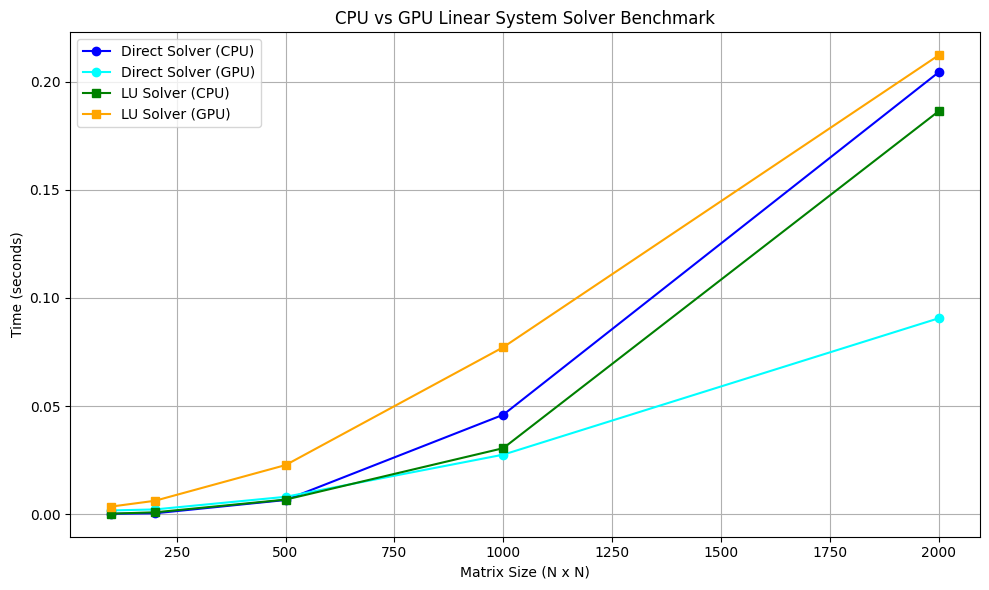

In [17]:
import numpy as np
import time
import matplotlib.pyplot as plt
import cupyx.scipy.linalg as cpx_linalg
from GPUPy.src.numerical_methods.linear_systems import  solve_linear_system, solve_linear_system_lu
from  GPUPy.src.numerical_methods.utils import choose_backend
sizes = [100, 200, 500, 1000, 2000]  # Matris boyutları
cpu_times_direct = []
gpu_times_direct = []
cpu_times_lu = []
gpu_times_lu = []

for n in sizes:
    print(f"\n--- Benchmarking size {n}x{n} ---")
    A = np.random.rand(n, n)
    b = np.random.rand(n)

    # Direct Solver CPU
    start = time.time()
    solve_linear_system(A, b, use_gpu=None)
    elapsed = time.time() - start
    cpu_times_direct.append(time.time() - start)
    print(f"Direct Solver (CPU): {elapsed:.6f} seconds")

    # Direct Solver GPU
    start = time.time()
    solve_linear_system(A, b, use_gpu=True)
    elapsed = time.time() - start
    gpu_times_direct.append(time.time() - start)
    print(f"Direct Solver (GPU): {elapsed:.6f} seconds")

    # LU Solver CPU
    start = time.time()
    solve_linear_system_lu(A, b, use_gpu=None)
    elapsed = time.time() - start
    cpu_times_lu.append(time.time() - start)
    print(f"LU Solver (CPU): {elapsed:.6f} seconds")

    # LU Solver GPU
    start = time.time()
    solve_linear_system_lu(A, b, use_gpu=True)
    elapsed = time.time() - start
    gpu_times_lu.append(time.time() - start)
    print(f"LU Solver (GPU): {elapsed:.6f} seconds")

# === Plotting ===
plt.figure(figsize=(10, 6))

plt.plot(sizes, cpu_times_direct, 'o-', label='Direct Solver (CPU)', color='blue')
plt.plot(sizes, gpu_times_direct, 'o-', label='Direct Solver (GPU)', color='cyan')
plt.plot(sizes, cpu_times_lu, 's-', label='LU Solver (CPU)', color='green')
plt.plot(sizes, gpu_times_lu, 's-', label='LU Solver (GPU)', color='orange')

plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (seconds)')
plt.title('CPU vs GPU Linear System Solver Benchmark')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

